In [0]:
########### @author Vinit ; 10th Jan 2019  #################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import keras
import os
import natsort
from imutils import paths
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten, Dropout
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from sklearn import model_selection
import pickle
import random
from keras.models import load_model
from sklearn.preprocessing import LabelBinarizer
from keras.callbacks import ModelCheckpoint
from keras.layers.advanced_activations import LeakyReLU

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
path="/content/gdrive/My Drive/colab/data"
imagepaths=list(paths.list_images(path))
random.shuffle(imagepaths)
image_dim=(300,300,3)
data=[]
labels=[]
for i in imagepaths:
	image=cv2.imread(i)
	image=cv2.resize(image,(image_dim[1],image_dim[0]))
	#cv2.imshow("image",image)
	#cv2.waitKey(0) & ord('q')
	image=img_to_array(image)
	data.append(image)
	label=i.split(os.path.sep)[-2]
	#print(label)
	labels.append(label)


In [0]:
num_classes=len(np.unique(labels))
data=np.array(data,dtype="float32")/255.0
labels=np.array(labels)
#pos=1; neg=0

[[1]
 [0]
 [0]
 ...
 [0]
 [0]
 [1]]


In [0]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
x_train,x_test,y_train,y_test=model_selection.train_test_split(data,labels,test_size=0.25,random_state=42)

In [0]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(np.count_nonzero(y_train == 1))
print(np.count_nonzero(y_train == 0))
print(np.count_nonzero(y_test == 1))
#depicts data test and train data has near equal share of categories

(1974, 300, 300, 3)
(1974, 1)
(658, 300, 300, 3)
450
1524
153


In [0]:
aug=ImageDataGenerator(rotation_range=25,width_shift_range=0.1,height_shift_range=0.1,shear_range=0.2,horizontal_flip=True,fill_mode="nearest")

In [0]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",activation="linear",input_shape=(300,300,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))

model.add(Conv2D(32,(3,3),padding="same",activation="linear"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),padding="same",activation="linear"))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),padding="same",activation="linear"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Conv2D(128,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(1024,activation="linear"))
model.add(LeakyReLU(alpha=0.1))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(1,activation="sigmoid"))

In [0]:
model.compile(loss=keras.losses.binary_crossentropy,optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 300, 300, 32)      896       
_________________________________________________________________
leaky_re_lu_11 (LeakyReLU)   (None, 300, 300, 32)      0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 300, 300, 32)      128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 100, 100, 32)      0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 100, 100, 32)      9248      
_________________________________________________________________
leaky_re_lu_12 (LeakyReLU)   (None, 100, 100, 32)      0         
__________

In [0]:
checkpoint=ModelCheckpoint(filepath='/content/gdrive/My Drive/colab/helmet_model.hdf5',save_best_only=True,verbose=1)
train=model.fit_generator(aug.flow(x_train,y_train,batch_size=64),validation_data=(x_test,y_test),steps_per_epoch=len(x_train)/64,epochs=150,verbose=1,callbacks=[checkpoint])

Epoch 1/150
31/30 [==============================] - 50s 2s/step - loss: 1.0637 - acc: 0.6580 - val_loss: 0.7803 - val_acc: 0.7918

Epoch 00001: val_loss improved from inf to 0.78030, saving model to /content/gdrive/My Drive/colab/helmet_model.hdf5
Epoch 2/150
31/30 [==============================] - 40s 1s/step - loss: 0.5813 - acc: 0.7569 - val_loss: 0.6192 - val_acc: 0.8009

Epoch 00002: val_loss improved from 0.78030 to 0.61917, saving model to /content/gdrive/My Drive/colab/helmet_model.hdf5
Epoch 3/150
31/30 [==============================] - 41s 1s/step - loss: 0.5154 - acc: 0.7842 - val_loss: 0.5555 - val_acc: 0.8191

Epoch 00003: val_loss improved from 0.61917 to 0.55553, saving model to /content/gdrive/My Drive/colab/helmet_model.hdf5
Epoch 4/150
31/30 [==============================] - 40s 1s/step - loss: 0.4747 - acc: 0.8024 - val_loss: 0.7893 - val_acc: 0.8040

Epoch 00004: val_loss did not improve from 0.55553
Epoch 5/150
31/30 [==============================] - 39s 1s/st

In [0]:
f=open("/content/gdrive/My Drive/colab/lb.pickle","wb")
f.write(pickle.dumps(lb))
f.close()

No Helmet
Helmet Detected


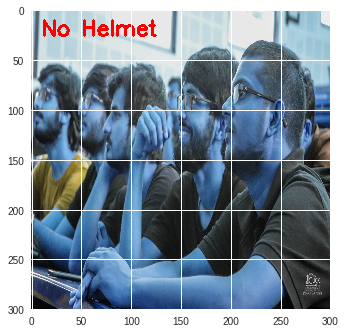

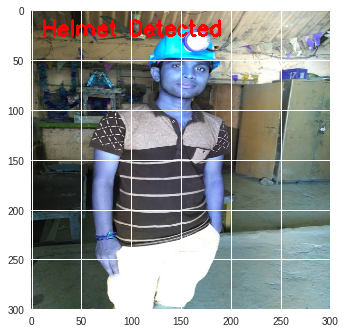

In [12]:
##############  Testing ##################################

from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np 
import imutils
import pickle
import cv2
import os
import matplotlib.pyplot as plt

model=load_model("/content/gdrive/My Drive/colab/helmet_model.hdf5")
#lb=pickle.loads(open("lb.pickle","rb").read())

img=cv2.imread("/content/gdrive/My Drive/colab/5.jpg")
img=cv2.resize(img,(300,300))
img2=img.copy()
img=img/255.0
img=np.expand_dims(img,axis=0)

img_neg=cv2.imread("/content/gdrive/My Drive/colab/1.jpg")
img_neg=cv2.resize(img_neg,(300,300))
img_=img_neg.copy()
img_neg=img_neg/255.0
img_neg=np.expand_dims(img_neg,axis=0)

pred=model.predict_classes(img)
if(pred==[1]):
	print("Helmet Detected")
	label="Helmet Detected"
else :
	print("No Helmet")
	label="No Helmet"

pred2=model.predict_classes(img_neg)
if(pred2==[1]):
	print("Helmet Detected")
	label2="Helmet Detected"
else :
	print("No Helmet")
	label2="No Helmet"

cv2.putText(img2,label,(10,25),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0),2)
plt.imshow(img2)
plt.show()
cv2.putText(img_,label2,(10,25),cv2.FONT_HERSHEY_SIMPLEX,0.7,(255,0,0),2)
plt.imshow(img_)
plt.show()
